# Parameter Estimation

En este notebook veremos algunas implementaciones en python de la estimación de parámetros

In [8]:
### Imports

from numpy import *
from scipy.stats import binom,beta
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from scipy.special import loggamma


### Binomial distribution

Dado datos de un experimento con dos outcomes posibles, Eg. Cara o Seca. En donde los datos son $N_{c} = k$ y $N_{s} = r$, tal que $k+s =N$, el número total realizaciones. La distribución binomial que describe la probabilidad de haber obtenido esos datos se escribe como:

$$
P(D|\theta) = {n \choose{k}} \theta^{k} (1-\theta)^{n-k}
$$

Si queremos hacer inferencia sobre el parámetro $\theta$ usamos el toerema de Bayes. Para eso necesitamos especificar "qué sabíamos de $\theta$ antes de obtener los datos, por simplicidad vamos a poner una _prior_ uniforme. La posterior de $\theta$ resulta en una distibución para $\theta$ que se escribe:

$$
P(\theta|DI) \propto P(D|\theta)P(\theta) =  {n \choose{k}} \theta^{k} (1-\theta)^{n-k}
$$

Y la cual se conoce como distribución $Beta$. Por lo que esta forma funcional es una distribución binomial si la vemos en función de los resultados de las tiradas de una moneda o bien es una distrbución beta si lo vemos como función del paráemetro que rige esos resultados.

## Code

In [42]:
def my_beta_dist(k,r,theta):
    '''
    Beta as a posterior of the binomial dist
    (Parameters)
    k: número de caras
    r: número de secas
    theta: probabilidad de salir cara.
    '''
    ### Prior
    if k == 0 and r == 0:
            return 1

    #### Likelihood and prior
    l_norm = loggamma(k+r+2)-loggamma(k+1)-loggamma(r+1)
    l_prior = 0

    ### cases when r or k == 0
    if k != 0 and r != 0:
        l_like = k*log(theta) + r*log(1-theta)
    else:
        l_like = 0
    return exp(l_like +l_prior + l_norm)




<ipython-input-42-2b55caa7daad>:19: RuntimeWarning: divide by zero encountered in log
  l_like = k*log(theta) + r*log(1-theta)


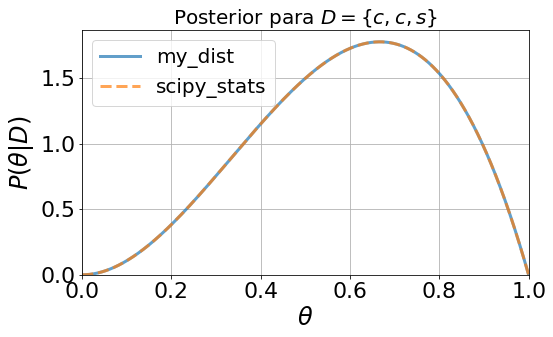

In [48]:
### Definitions data and grid
theta_grid = linspace(0,1,1000)
k = 2
r = 1

### Plot
fig = plt.figure(figsize = (8,4.5))
plt.title("Posterior para " + r"$D = \{c,c,s\}$",fontsize = 20)

plt.plot(theta_grid,my_beta_dist(k,r,theta_grid),linewidth = 3,alpha =0.7,label ="my_dist")
plt.plot(theta_grid,beta.pdf(theta_grid,a = k+1,b = r+1),linestyle = "--",linewidth = 3,alpha =0.7,label = "scipy_stats")

plt.ylim(0,)
plt.xlim(0,1)
plt.ylabel(r"$P(\theta|D)$", fontsize=24)
plt.xlabel(r"$\theta$ ",fontsize = 24)
plt.tick_params(axis='both', which='major', labelsize=22)

plt.grid()
plt.legend(fontsize=20)



No handles with labels found to put in legend.


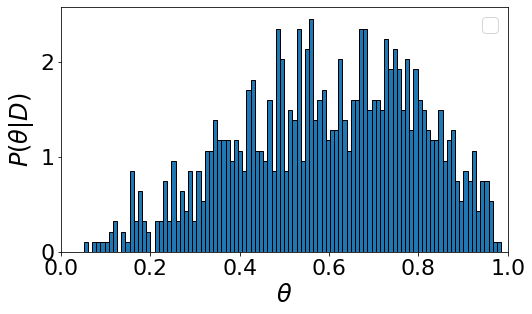

In [55]:
### Sampling



beta_values = beta.rvs(a = k+1,b = r+1,size = 1000)

fig = plt.figure(figsize = (8,4.5))
plt.hist(beta_values,bins = 100,density = True, edgecolor = "k")

plt.ylim(0,)
plt.xlim(0,1)
plt.ylabel(r"$P(\theta|D)$", fontsize=24)
plt.xlabel(r"$\theta$ ",fontsize = 24)
plt.tick_params(axis='both', which='major', labelsize=22)

plt.legend(fontsize=20)


## Nueva tirada $P(c|D)$

Veamos cuál es la probabilidad de cara ahora que incororamos los datos. Esto lo ahcemos integrando sobre todos los valores de $\theta$ posibles dada la inferencia y viendo en cada caso cuál es la probabilidad que para ese $\theta$ resulta en cara la tirada.
$$
P(c|D) = \int P(c|D\theta) P(\theta|D) d\theta =  \frac{k+1}{n+2}
$$

Esto coincide con el valor medio de $\theta$ dado por la regla de sucesión de Laplace. 

En la práctica estas integrales no son sencillas de hacer y las hacemos por simulación. Para ello tomamos por cada valor de $\theta$ que sale de la posterior y con ese valor simulamos si sale cara o seca. Luego vemos el histograma de resultados y con eso estimamos la probabilidad.






In [59]:
new_data = []
for b in beta_values:
    new_data.append(binom.rvs(p=b, n =1))

numeric =  0.611
analitic=  0.6


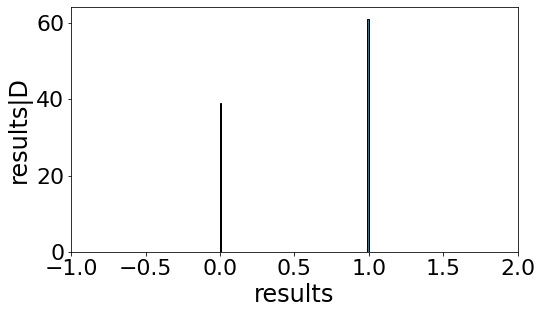

In [65]:
##plot hist

fig = plt.figure(figsize = (8,4.5))
plt.hist(new_data,bins = 100,density = True, edgecolor = "k")

plt.ylim(0,)
plt.xlim(-1,2)
plt.ylabel("results|D", fontsize=24)
plt.xlabel( "results",fontsize = 24)
plt.tick_params(axis='both', which='major', labelsize=22)


print("numeric = ", sum(new_data)/len(new_data))
print("analitic= ", (k+1)/(k+r+2))